In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 파이썬을 이용한 데이터 분석

## 1. 파이썬을 이용한 기술통계: 1변량 데이터

### 통계 처리와 scipy

In [ ]:
# 라이브러리 불러오기
import numpy as np
import scipy as sp

# 자릿수 고정
%precision 3

'%.3f'

### 1변량 데이터의 관리

In [ ]:
fish_data = np.array([2,3,3,4,4,4,4,5,5,6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

### 합계와 샘플사이즈

In [ ]:
# 合計
sp.sum(fish_data)

<ipython-input-391-271beee01be4>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sp.sum(fish_data)


40

In [ ]:
# numpy
np.sum(fish_data)

40

In [ ]:
# 내장 함수
fish_data.sum()

40

In [ ]:
# 내장 함수
sum(fish_data)

40

In [ ]:
# 데이터 길이
len(fish_data)

10

### 평균값(기댓값)

In [ ]:
# 평균
N = len(fish_data)
sum_value = sp.sum(fish_data)
mu = sum_value / N
mu

<ipython-input-396-47b0eaff4889>:3: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sum_value = sp.sum(fish_data)


4.0

In [ ]:
# scipy를 이용한 평균
sp.mean(fish_data)

<ipython-input-397-707b2e34adfc>:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(fish_data)


4.0

### 표본분산

In [ ]:
# 표본분산
sigma_2_sample = sp.sum((fish_data - mu) ** 2) / N
sigma_2_sample

<ipython-input-398-9f4131f234f7>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sigma_2_sample = sp.sum((fish_data - mu) ** 2) / N


1.2

In [ ]:
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

In [ ]:
fish_data - mu

array([-2., -1., -1.,  0.,  0.,  0.,  0.,  1.,  1.,  2.])

In [ ]:
(fish_data - mu) ** 2

array([4., 1., 1., 0., 0., 0., 0., 1., 1., 4.])

In [ ]:
sp.sum((fish_data - mu) ** 2)

<ipython-input-402-941c80e81f13>:1: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sp.sum((fish_data - mu) ** 2)


12.0

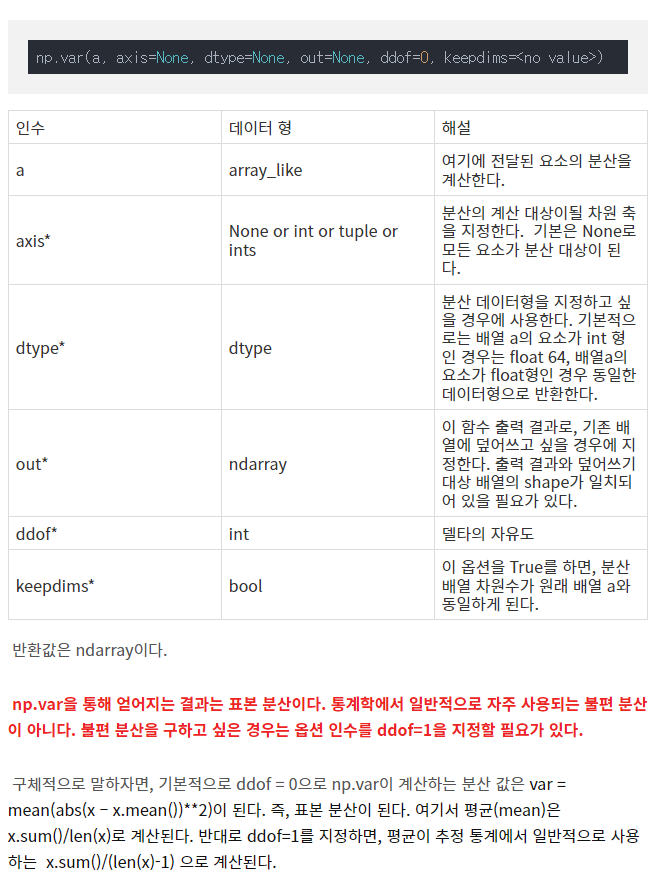

In [ ]:
# ddof 는 자유도를 뜻하며 기본값은 '0'으로 분산 계산에 사용될 데이터 셋의 개수 N으로 설정한다.
# 추정 통계에 사용하는 불편 분산은 ddof=1로 지정(N-1)
# 'ddof = 0' 모분산
# https://engineer-mole.tistory.com/242
sp.var(fish_data, ddof = 0)

<ipython-input-403-ab1815be1ac1>:5: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  sp.var(fish_data, ddof = 0)


1.2

In [ ]:
sp.var(fish_data, ddof = 1)

<ipython-input-404-24dee2524cd0>:1: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  sp.var(fish_data, ddof = 1)


1.3333333333333333

### 불편분산
- 표본분산은 표본의 평균을 사용해서 분산을 계산한 값이다.
- 이 값은 분산을 과소추정하는 경향이 있다. 이를 없애기 위한 (N대신 N-1) 것이 불편분산이다.

In [ ]:
# 불편분산
sigma_2 = sp.sum((fish_data - mu) ** 2) / (N - 1)
sigma_2

<ipython-input-405-ce367c9880c9>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sigma_2 = sp.sum((fish_data - mu) ** 2) / (N - 1)


1.3333333333333333

In [ ]:
# scipy를 이용한 불편분산
sp.var(fish_data, ddof = 1)

<ipython-input-406-f9dcf65f805c>:2: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  sp.var(fish_data, ddof = 1)


1.3333333333333333

### 표준편차(표본평균의 표준편차)
- 자유도 N-1(ddof = 1)

In [ ]:
# 표본평균의 표준편차
sigma = sp.sqrt(sigma_2)
sigma

<ipython-input-407-ffd67ba8bf82>:2: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  sigma = sp.sqrt(sigma_2)


1.1547005383792515

In [ ]:
sp.std(fish_data, ddof = 1)

<ipython-input-408-e3c580b14ee4>:1: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  sp.std(fish_data, ddof = 1)


1.1547005383792515

### 표준화
- 데이터의 평균을 '0', 표준편차(분산)을 '1'로 변환
- 데이터의 평균값을 0으로 만드는 방법은 모든 데이터 값에서 평균값을 빼면 된다.

In [ ]:
fish_data - mu

array([-2., -1., -1.,  0.,  0.,  0.,  0.,  1.,  1.,  2.])

In [ ]:
sp.mean(fish_data - mu)

<ipython-input-410-0f06c76070e6>:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(fish_data - mu)


0.0

In [ ]:
fish_data / sigma

array([1.732, 2.598, 2.598, 3.464, 3.464, 3.464, 3.464, 4.33 , 4.33 ,
       5.196])

In [ ]:
sp.std(fish_data / sigma, ddof = 1)

<ipython-input-412-adfefc38887d>:1: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  sp.std(fish_data / sigma, ddof = 1)


1.0

In [ ]:
standard = (fish_data - mu) / sigma
standard

array([-1.732, -0.866, -0.866,  0.   ,  0.   ,  0.   ,  0.   ,  0.866,
        0.866,  1.732])

In [ ]:
sp.mean(standard)

<ipython-input-414-724a1faa1142>:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(standard)


2.2204460492503132e-17

In [ ]:
sp.std(standard, ddof = 1)

<ipython-input-415-1514f366c145>:1: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  sp.std(standard, ddof = 1)


1.0

### 그 외의 통계량

In [ ]:
# 최대
sp.amax(fish_data)

<ipython-input-416-b1fb22f99c51>:2: DeprecationWarning: scipy.amax is deprecated and will be removed in SciPy 2.0.0, use numpy.amax instead
  sp.amax(fish_data)


6

In [ ]:
# 최소
sp.amin(fish_data)

<ipython-input-417-aebc68ad5358>:2: DeprecationWarning: scipy.amin is deprecated and will be removed in SciPy 2.0.0, use numpy.amin instead
  sp.amin(fish_data)


2

In [ ]:
# 중앙값
sp.median(fish_data)

<ipython-input-418-bdcf20710a20>:2: DeprecationWarning: scipy.median is deprecated and will be removed in SciPy 2.0.0, use numpy.median instead
  sp.median(fish_data)


4.0

In [ ]:
# 일반적으로 좌우 대칭인 데이터의 평균과 중앙값은 거의 동일하다.
# 하지만 아래의 데이터처럼 한쪽으로 치우친 데이터는 중앙값과 평균값이 극명히 차이가 난다.

# 평균값은 이상치의 영향을 크게 받지만, 중앙값은 그다지 변화하지 않는 경향이 있다.

fish_data_2 = np.array([2,3,3,4,4,4,4,5,5,100])

In [ ]:
sp.mean(fish_data_2)

<ipython-input-420-6bc7cbd09eab>:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(fish_data_2)


13.4

In [ ]:
sp.median(fish_data_2)

<ipython-input-421-d46825e1bd76>:1: DeprecationWarning: scipy.median is deprecated and will be removed in SciPy 2.0.0, use numpy.median instead
  sp.median(fish_data_2)


4.0

### scipy.stats와 사분위수

In [ ]:
from scipy import stats

In [ ]:
fish_data_3 = np.array([1,2,3,4,5,6,7,8,9])
stats.scoreatpercentile(fish_data_3, 25)

3.0

In [ ]:
stats.scoreatpercentile(fish_data_3, 75)

7.0

In [ ]:
# numpy를 이용할 수 있다.

print(np.quantile(fish_data_3, 0.25))
print(np.quantile(fish_data_3, 0.75))

3.0
7.0


## 2. 파이썬을 이용한 기술통계: 다변량 데이터

### 다변량 데이터 관리하기

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import scipy as sp

# 소수점 자릿수 고정
%precision 3

'%.3f'

### 그룹별 통계량 계산하기

In [ ]:
fish_multi = pd.read_csv("/content/drive/MyDrive/StatsCraftLab/practice/data/3-2-1-fish_multi.csv")
print(fish_multi)

  species  length
0       A       2
1       A       3
2       A       4
3       B       6
4       B       8
5       B      10


In [ ]:
# 물고기 데이터의 몸길이 평균 데이터
group = fish_multi.groupby("species")
print(group.mean())

         length
species        
A           3.0
B           8.0


In [ ]:
print(group.std(ddof = 1))

         length
species        
A           1.0
B           2.0


In [ ]:
group.describe()

length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

### 교차분석표 구현하기

In [ ]:
shoes = pd.read_csv("/content/drive/MyDrive/StatsCraftLab/practice/data/3-2-2-shoes.csv")
print(shoes)

   store color  sales
0  tokyo  blue     10
1  tokyo   red     15
2  osaka  blue     13
3  osaka   red      9


In [ ]:
cross = pd.pivot_table(
    data = shoes,
    values = "sales",
    aggfunc = "sum",
    index = "store",
    columns = "color"
)
print(cross)

color  blue  red
store           
osaka    13    9
tokyo    10   15


### 공분산
- 공분산은 2개의 연속형 변수의 관계성을 확인하는 통계량
  - 공분산이 0보다 클 때: 변수 한쪽이 큰 값을 갖게 되면 다른 한 쪽도 커진다.
  - 공분산이 0보다 작을 때: 변수 한 쪽이 큰 값을 갖게 되면 다른 한쪽은 작아진다.
  - 공분산이 0일 때: 변수 사이에 관계성이 없다.

In [ ]:
cov_data = pd.read_csv("/content/drive/MyDrive/StatsCraftLab/practice/data/3-2-3-cov.csv")
print(cov_data)

      x   y
0  18.5  34
1  18.7  39
2  19.1  41
3  19.7  38
4  21.5  45
5  21.7  41
6  21.8  52
7  22.0  44
8  23.4  44
9  23.8  49


In [ ]:
# 데이터 분리
x = cov_data["x"]
y = cov_data["y"]

# 표본 크기
N = len(cov_data)

# 평균값 계산
mu_x = sp.mean(x)
mu_y = sp.mean(y)

<ipython-input-434-1903cc04299f>:9: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mu_x = sp.mean(x)
<ipython-input-434-1903cc04299f>:10: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mu_y = sp.mean(y)


In [ ]:
# 공분산 (분모 N)
cov_sample = sum((x - mu_x) * (y - mu_y)) / N
cov_sample

6.906

In [ ]:
# 공분산 (분모 N-1)
cov = sum((x - mu_x) * (y - mu_y)) / (N - 1)
cov

7.673

### 분산-공분산 행렬

In [ ]:
# 공분산(자유도 N)
sp.cov(x, y, ddof = 0)

<ipython-input-437-6939854e558a>:2: DeprecationWarning: scipy.cov is deprecated and will be removed in SciPy 2.0.0, use numpy.cov instead
  sp.cov(x, y, ddof = 0)


array([[ 3.282,  6.906],
       [ 6.906, 25.21 ]])

In [ ]:
# 공분산(자유도 N-1)
sp.cov(x, y, ddof = 1)

<ipython-input-438-1f4819254a43>:2: DeprecationWarning: scipy.cov is deprecated and will be removed in SciPy 2.0.0, use numpy.cov instead
  sp.cov(x, y, ddof = 1)


array([[ 3.646,  7.673],
       [ 7.673, 28.011]])

### 피어슨 상관계수
- 분모와 분자가 같은 값 ( 공분산(covariance) 에는 N 또는 N-1 이 분모 / 표준편차 역시 분모는 N 또는 N-1 )으로 나눠지므로 분산과 공분산 계산식의 분모에 N을 사용하든 N-1을 사용하든 상관계수는 변하지 않는다!!

In [ ]:
# 분산 계산 (N-1)
sigma_2_x = sp.var(x, ddof = 1)
sigma_2_y = sp.var(y, ddof = 1)

# 상관계수 (N-1)
rho = cov / sp.sqrt(sigma_2_x * sigma_2_y)
rho

<ipython-input-439-a375571c632f>:2: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  sigma_2_x = sp.var(x, ddof = 1)
<ipython-input-439-a375571c632f>:3: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  sigma_2_y = sp.var(y, ddof = 1)
<ipython-input-439-a375571c632f>:6: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  rho = cov / sp.sqrt(sigma_2_x * sigma_2_y)


0.7592719041137088

In [ ]:
# 분산 계산 (N)
sigma_2_x_sample = sp.var(x, ddof = 0)
sigma_2_y_sample = sp.var(y, ddof = 0)

# 상관계수 (N)
cov_sample / sp.sqrt(sigma_2_x_sample * sigma_2_y_sample)

<ipython-input-440-034806eb07b4>:2: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  sigma_2_x_sample = sp.var(x, ddof = 0)
<ipython-input-440-034806eb07b4>:3: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  sigma_2_y_sample = sp.var(y, ddof = 0)
<ipython-input-440-034806eb07b4>:6: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  cov_sample / sp.sqrt(sigma_2_x_sample * sigma_2_y_sample)


0.7592719041137087

In [ ]:
# 상관계수(행렬)
sp.corrcoef(x, y)

<ipython-input-441-b943f895a606>:2: DeprecationWarning: scipy.corrcoef is deprecated and will be removed in SciPy 2.0.0, use numpy.corrcoef instead
  sp.corrcoef(x, y)


array([[1.   , 0.759],
       [0.759, 1.   ]])

## matplotlib과 seaborn을 이용한 데이터 시각화

### 시각화를 위한 준비

In [ ]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd

# 표시 자릿수 지정
%precision 3

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt

# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

### pyplot을 이용한 꺾은선 그래프

In [ ]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([2,3,4,3,5,4,6,7,4,8])

Text(0, 0.5, 'y')

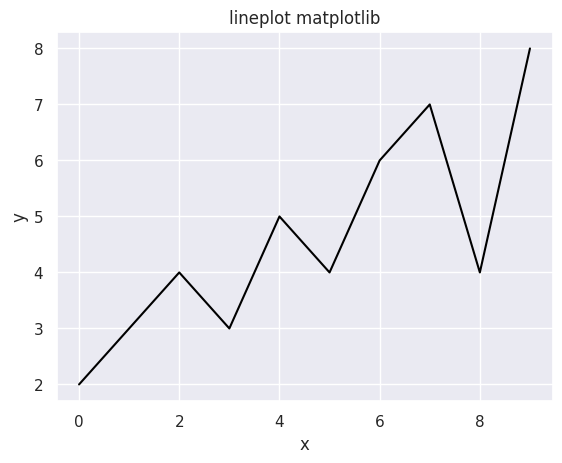

In [ ]:
plt.plot(x, y, color = 'black')
plt.title("lineplot matplotlib")
plt.xlabel("x")
plt.ylabel("y")

### seaborn과 pyplot을 이용한 꺾은선 그래프

In [ ]:
import seaborn as sns

# 그래프 디자인
sns.set()

Text(0, 0.5, 'y')

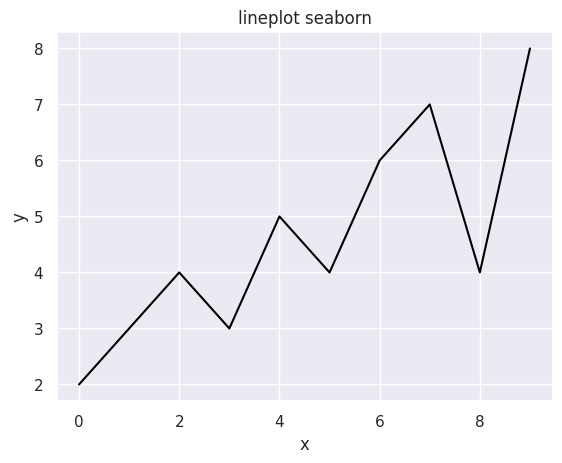

In [ ]:
plt.plot(x, y, color = 'black')
plt.title("lineplot seaborn")
plt.xlabel("x")
plt.ylabel("y")

### seaborn을 이용한 히스토그램

In [ ]:
fish_data = np.array([2,3,3,4,4,4,4,5,5,6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

<ipython-input-448-f2bb334ec673>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fish_data, bins = 5,


<Axes: >

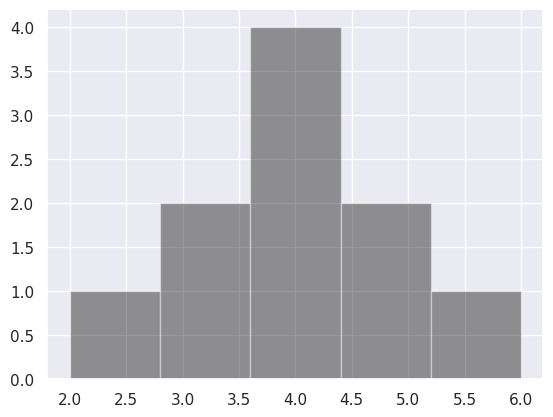

In [ ]:
# bin은 구간 개수를 뜻.
# 'bins = 5' 는 데이터를 5개 구간으로 나누어 도수를 구하여 표시
sns.distplot(fish_data, bins = 5,
             color = 'black', kde = False)

### 커널밀도추정에 따른 히스토그램 평활화
- 위 그래프에서는 kde = False 로 커널밀도추정을 하지 않게 하였다.
- 커널밀도추정은 히스토그램이 가진 문제를 해소하기 위한 방법이다.
  - 히스토그램의 문제는 구간을 어떻게 정하느냐에 따라 모양이 크게 바뀐다는 점이다.
  - 극단적으로 'bins = 1'로 지정하면 구간을 하나로 지정하므로 데이터의 특징이 드러나지 않는다.
- 따라서, bins 를 지정하지 않고 커널밀도추정(kde)를 True(기본값)으로 설정하면 구간을 나누는 것이 아니라 히스토그램을 부드러운 선으로 이어나가는 것이된다(->평활화)

<ipython-input-449-e1e901b96b63>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fish_data, bins = 1,


<Axes: >

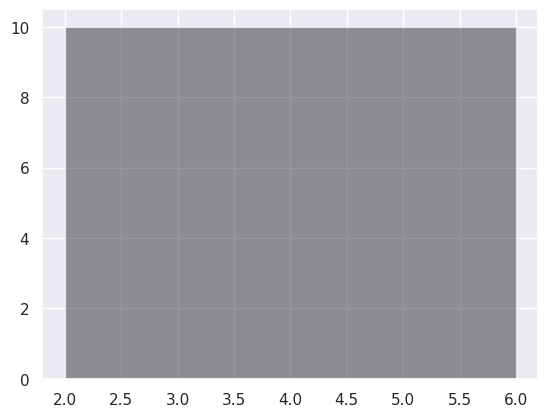

In [ ]:
sns.distplot(fish_data, bins = 1,
             color = 'black', kde = False)

<ipython-input-450-26630f4d0dfa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fish_data, color = 'black')


<Axes: ylabel='Density'>

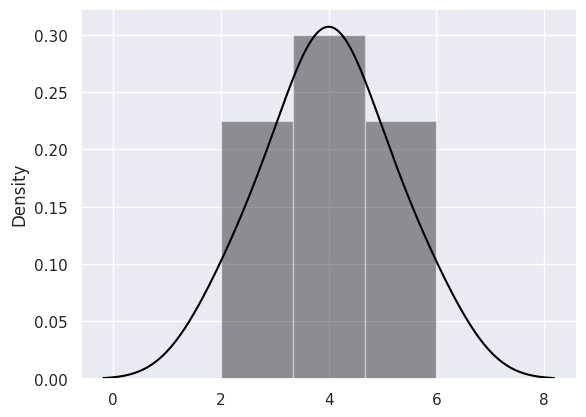

In [ ]:
# 커널밀도추정의 결과를 표시하려면 'kde=True'(기본값), bins 는 지정하지 않으면 된다.
# 또한 히스토그램의 면적 합계가 1이 되도록 바뀌는데 이는 정규분포의 형태로 만든다. (norm_hist = True : 기본값)
sns.distplot(fish_data, color = 'black')

### 2변량 데이터에 대한 히스토그램

In [ ]:
fish_multi = pd.read_csv("/content/drive/MyDrive/StatsCraftLab/practice/data/3-3-2-fish_multi_2.csv")
print(fish_multi)

   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
5        A       4
6        A       4
7        A       5
8        A       5
9        A       6
10       B       5
11       B       6
12       B       6
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


In [ ]:
print(fish_multi.groupby("species").describe())

        length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0


In [ ]:
# 종류별 몸길이 데이터를 추출
length_a = fish_multi.query('species == "A"')["length"]
length_b = fish_multi.query('species == "B"')["length"]

<ipython-input-454-758ad93bce2b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(length_a, bins = 5,
<ipython-input-454-758ad93bce2b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(length_b, bins = 5,


<Axes: xlabel='length'>

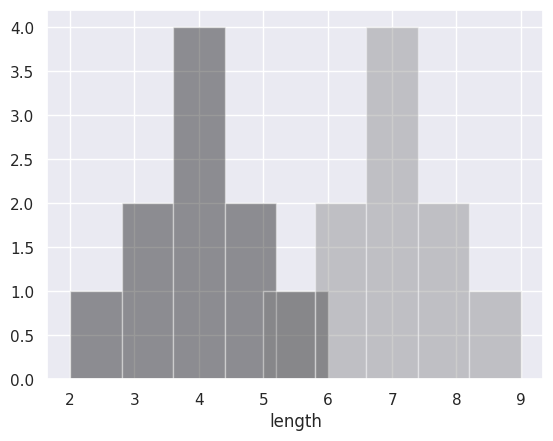

In [ ]:
# 히스토그램을 그리는 함수를 2번 연속 실행하면 겹쳐진 히스토그램을 그린다.
sns.distplot(length_a, bins = 5,
             color = 'black', kde = False)
sns.distplot(length_b, bins = 5,
             color = 'gray', kde = False)

### Boxplot
- 상자 중심선은 중앙값(median)
- 상자 윗단과 아랫단은 각각 75%(Q3), 25%(Q1) 사분위점

<Axes: xlabel='species', ylabel='length'>

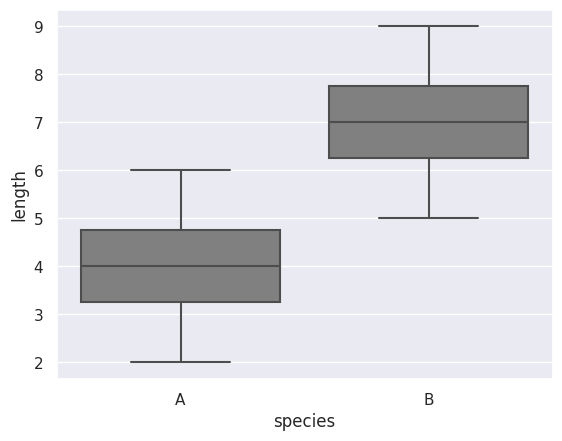

In [ ]:
sns.boxplot(x = "species", y  = "length",
            data = fish_multi, color = 'gray')

In [ ]:
fish_multi.groupby("species").describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

### Violinplot
- Boxplot의 Box 대신 커널밀도추정(kde)의 결과를 사용
  - Box 대신 히스토그램을 세로로 세워서 배치

<Axes: xlabel='species', ylabel='length'>

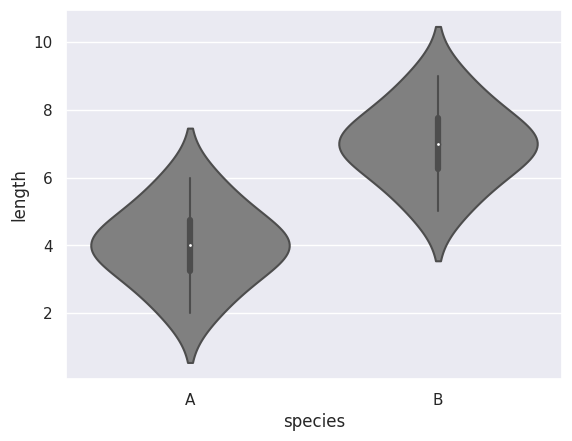

In [ ]:
sns.violinplot(x = "species", y  = "length",
               data = fish_multi, color = 'gray')

### 막대그래프(barplot)
- 막대의 높이는 평균
- 검은 선은 에러바(error bar)라고 하며, 신뢰구간을 나타낸다.
- Box plot 이나 violin plot 보다 정보가 적다.

<Axes: xlabel='species', ylabel='length'>

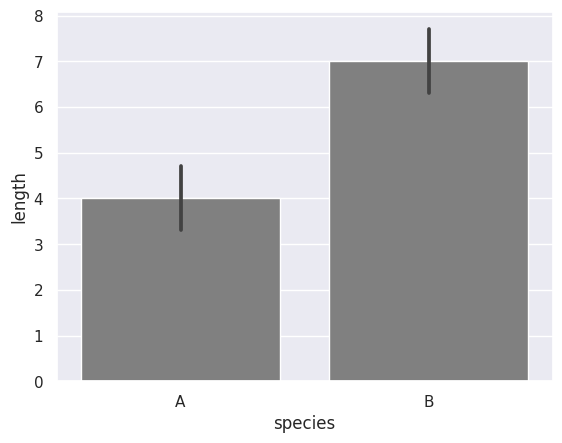

In [ ]:
sns.barplot(x = "species", y  = "length",
            data = fish_multi, color = 'gray')

### 산포도
- 수치형 x 수치형

In [ ]:
cov_data = pd.read_csv("/content/drive/MyDrive/StatsCraftLab/practice/data/3-2-3-cov.csv")
print(cov_data)

      x   y
0  18.5  34
1  18.7  39
2  19.1  41
3  19.7  38
4  21.5  45
5  21.7  41
6  21.8  52
7  22.0  44
8  23.4  44
9  23.8  49


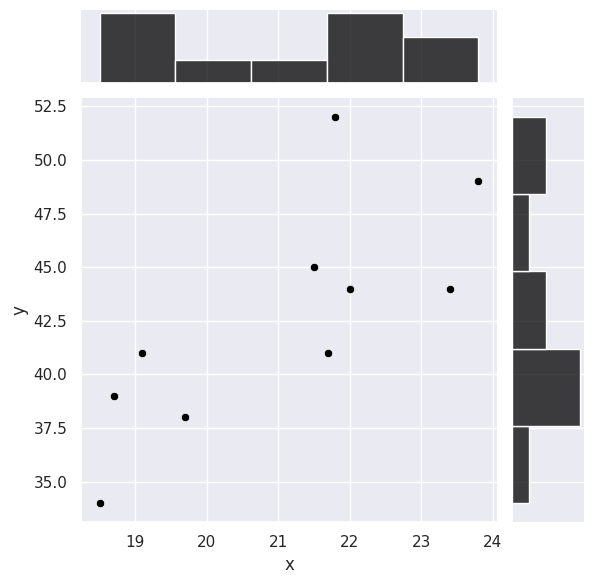

In [ ]:
# jointplot을 사용하여, 산포도와 함께 히스토그램도 함께 나타낼 수 있다.
sns.jointplot(x = "x", y = "y",
              data = cov_data, color = 'black')

### pairplot
- 많은 양의 변수를 가지고 있는 데이터를 대상
- pairplot은 데이터프레임만 넘겼을 경우엔 산포도를 그리지만, hue = '카테고리 변수의 열 이름'을 인수로 넘기면 카테고리별로 색을 나누어 그래프를 그린다.
- 수치형 간의 데이터(가로: 수치형, 세로: 수치형)은 산포도를 나타내며, 특히 대각선은 두 변수(데이터)간의 각각의 히스토그램(분포)를 나타낸다.

In [ ]:
iris = sns.load_dataset("iris")
iris.head(n = 3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [ ]:
iris.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


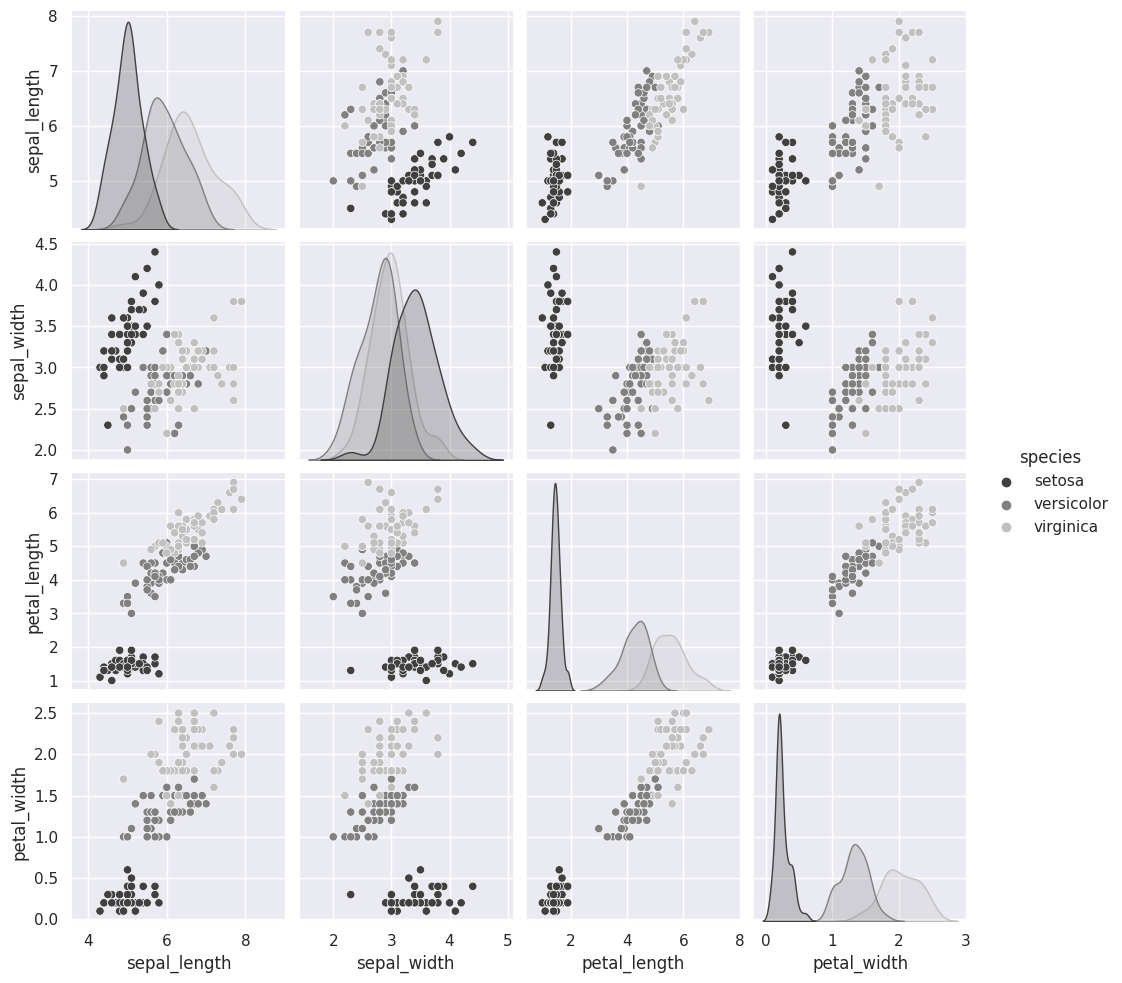

In [ ]:
# jointplot
sns.pairplot(iris, hue="species", palette='gray')

## 모집단에서 표본 추출 시뮬레이션

### 라이브러리 불러오기

In [ ]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 표시 자릿수 지정
%precision 3
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

### 5마리 물고기의 예

In [ ]:
fish_5 = np.array([2,3,4,5,6])
fish_5

array([2, 3, 4, 5, 6])

In [ ]:
# 5마리 물고기 중 랜덤으로 1마리 (size = 1) 고르기
np.random.choice(fish_5, size = 1, replace = False)

array([3])

In [ ]:
# 5마리 물고기 중 랜덤으로 1마리 (size = 3) 고르기
# replace = False 는 비복원 추출로 뽑은 물고리는 다시 뽑지 않는다.
np.random.choice(fish_5, size = 3, replace = False)

array([4, 5, 2])

In [ ]:
# 랜덤 추출이므로 위와 코드는 같으나 결과는 달라질 수 있다.
np.random.choice(fish_5, size = 3, replace = False)

array([2, 4, 6])

In [ ]:
# 난수 시드 (np.random.seed) 함수를 이용하면 랜덤으로 추출하더라도 같은 시드를 가지므로 같은 결과값을 출력한다.
np.random.seed(1)
np.random.choice(fish_5, size = 3, replace = False)

array([4, 3, 6])

In [ ]:
np.random.seed(1)
np.random.choice(fish_5, size = 3, replace = False)

array([4, 3, 6])

In [ ]:
# 골라낸 표본의 평균값 계산(=> '표본평균')
# seed를 지정하여 추출하면 첫 번째 표본이 되고 추출된 데이터의 평균은 표본평균이 된다.
np.random.seed(1)
sp.mean(
    np.random.choice(fish_5, size = 3, replace = False)
)

<ipython-input-471-ef2feb470b56>:4: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(


4.333333333333333

### 더 많은 물고기가 있는 호수에서 표본추출

In [ ]:
fish_100000 = pd.read_csv(
    "/content/drive/MyDrive/StatsCraftLab/practice/data/3-4-1-fish_length_100000.csv")["length"]
fish_100000.head()

0    5.297442
1    3.505566
2    3.572546
3    3.135979
4    4.689275
Name: length, dtype: float64

In [ ]:
len(fish_100000)

100000

In [ ]:
# 10마리 비복원 랜덤 추출
sampling_result = np.random.choice(
    fish_100000, size = 10, replace = False)
sampling_result

array([4.091, 5.465, 3.426, 4.287, 4.244, 4.282, 4.29 , 5.087, 2.769,
       5.296])

In [ ]:
# 표본평균
sp.mean(sampling_result)

<ipython-input-475-d3699882f21c>:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(sampling_result)


4.3235970793805025

### 모집단분포

In [ ]:
# 모집단 평균
sp.mean(fish_100000)

<ipython-input-476-9262a1fbe08f>:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(fish_100000)


4.000000000000001

In [ ]:
# 모집단 표준편차(자유도 N -> 모집단)
sp.std(fish_100000, ddof = 0)

<ipython-input-477-6a6c9381570e>:2: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  sp.std(fish_100000, ddof = 0)


0.7999999999999999

In [ ]:
# 모집단 분산(자유도 N -> 모집단)
sp.var(fish_100000, ddof = 0)

<ipython-input-478-7f045e6caa3e>:2: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  sp.var(fish_100000, ddof = 0)


0.6399999999999999

<ipython-input-479-74cc8c47c365>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fish_100000, kde = False, color = 'black')


<Axes: xlabel='length'>

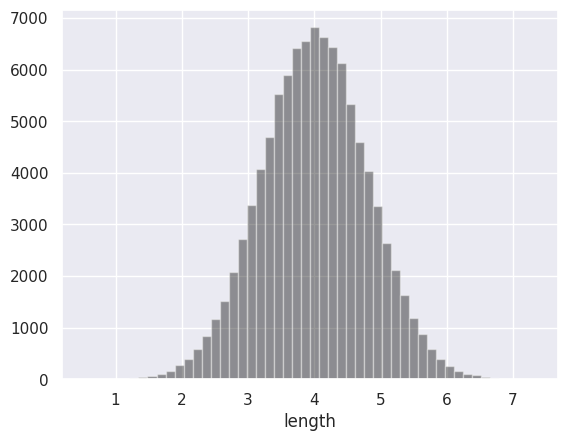

In [ ]:
sns.distplot(fish_100000, kde = False, color = 'black')

### 모집단분포와 정규본포 간 확률밀도함수 비교

In [ ]:
# 1~7까지를 0.1 단위로 해서 등차수열을 이루는 모집단을 만든다.
x = np.arange(start = 1, stop = 7.1, step = 0.1)
x

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

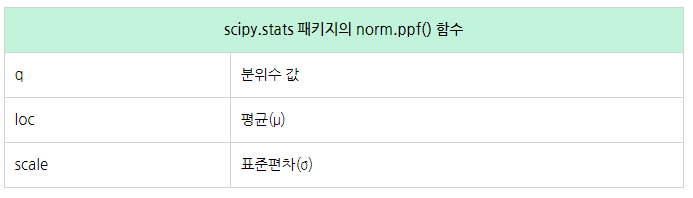

In [ ]:
# stats.norm.pdf 로 확률밀도 함수를 만든다.
# 인수 'loc'는 평균값이고, 'scale'은 표준편차를 나타낸다.
# https://m.blog.naver.com/pmw9440/221805677577
stats.norm.pdf(x = x, loc = 4, scale = 0.8)

array([4.407e-04, 6.988e-04, 1.091e-03, 1.676e-03, 2.536e-03, 3.778e-03,
       5.540e-03, 7.998e-03, 1.137e-02, 1.591e-02, 2.191e-02, 2.971e-02,
       3.967e-02, 5.215e-02, 6.749e-02, 8.598e-02, 1.078e-01, 1.332e-01,
       1.619e-01, 1.938e-01, 2.283e-01, 2.648e-01, 3.025e-01, 3.401e-01,
       3.764e-01, 4.102e-01, 4.401e-01, 4.648e-01, 4.833e-01, 4.948e-01,
       4.987e-01, 4.948e-01, 4.833e-01, 4.648e-01, 4.401e-01, 4.102e-01,
       3.764e-01, 3.401e-01, 3.025e-01, 2.648e-01, 2.283e-01, 1.938e-01,
       1.619e-01, 1.332e-01, 1.078e-01, 8.598e-02, 6.749e-02, 5.215e-02,
       3.967e-02, 2.971e-02, 2.191e-02, 1.591e-02, 1.137e-02, 7.998e-03,
       5.540e-03, 3.778e-03, 2.536e-03, 1.676e-03, 1.091e-03, 6.988e-04,
       4.407e-04])

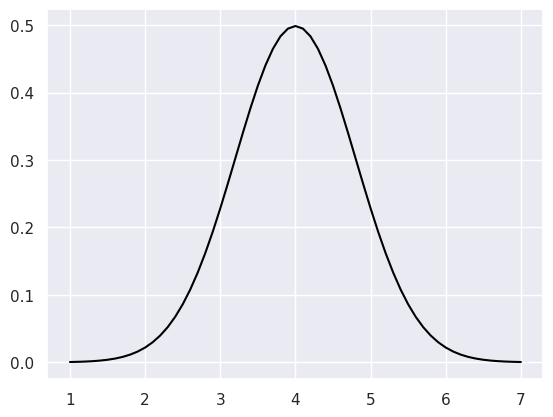

In [ ]:
plt.plot(x,
         stats.norm.pdf(x = x, loc = 4, scale = 0.8),
         color = 'black')

<ipython-input-483-cdc99b6b8572>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fish_100000, kde = False,


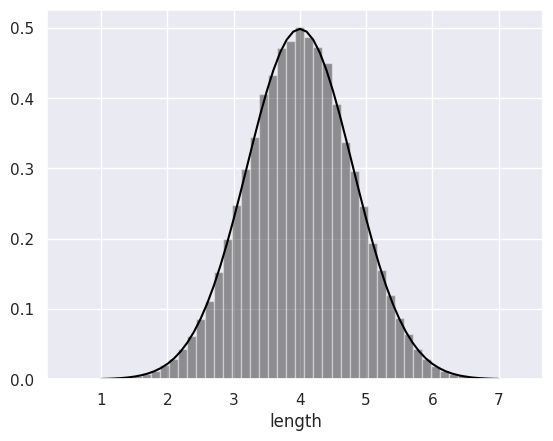

In [ ]:
# 정규분포의 확률밀도와 모집단의 히스토그램을 겹쳐서 그리기

# norm_hist = True 를 지정하면 히스토그램의 면적이 1이된다.
sns.distplot(fish_100000, kde = False,
             norm_hist = True, color = 'black')
plt.plot(x,
         stats.norm.pdf(x = x, loc = 4, scale = 0.8),
         color = 'black')

### 표본을 얻는 절차의 추상화

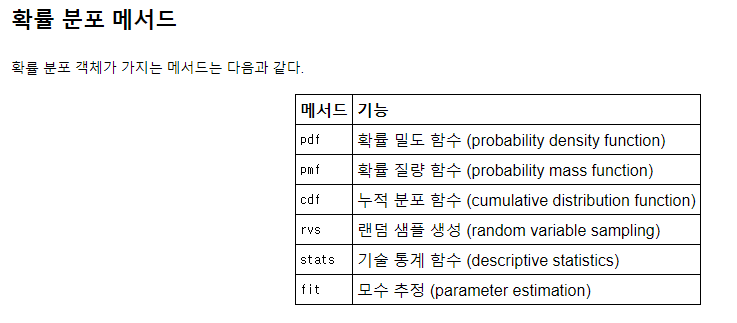

In [ ]:
# scipy.stats 패키지의 norm.rvs() 함수는 정규확률분포로부터 난수를 생성시킬 수 있다.
# 입력인자는 size, random_state 등이 있으며 size 인자는 난수갯수이며,
# random_state은 난수가 계산될 때, 초기값을 정하여 항상 같은 결과가 나오게 설정하는 인자다.
# https://namyoungkim.github.io/scipy/probability/2017/09/04/scipy/

# 평균 4 (loc = 4)
# 표준편차 (scale = 0.8)
# 크기 (size = 10)
sampling_norm = stats.norm.rvs(
    loc = 4, scale = 0.8, size = 10)
sampling_norm

array([4.037, 3.498, 4.322, 5.295, 5.499, 2.905, 4.437, 4.665, 3.786,
       4.569])

In [ ]:
# 표본평균
sp.mean(sampling_norm)

<ipython-input-485-06bc53de2964>:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(sampling_norm)


4.301401664573935

## 표본 통계량 성질

In [ ]:
# 모집단 (평균 4, 표준편차 0.8)
population = stats.norm(loc = 4, scale = 0.8)

### 표본평균을 여러 번 계산하기

In [ ]:
# 길이가 10000개인 배열 준비 (값은 '0'으로 np.zeros)
sample_mean_array = np.zeros(10000)

In [ ]:
# 길이가 10000개인 배열에 10000개의 표본평균을 저장
# 샘플 크기는 10개 (즉, 1개의 표본은 10개의 샘플)
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    sample_mean_array[i] = sp.mean(sample)

<ipython-input-488-9c7a51e09408>:6: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean_array[i] = sp.mean(sample)


In [ ]:
sample_mean_array

array([3.922, 3.864, 4.07 , ..., 4.136, 4.575, 4.099])

### 標本平均の平均値は、母平均に近い

In [ ]:
# 10000개의 표본평균푭의 평균
sp.mean(sample_mean_array)

<ipython-input-490-100d31947880>:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(sample_mean_array)


4.004202422791747

In [ ]:
# 10000개의 표본평균의 표준편차(자유도 N-1 -> 불편분산)
sp.std(sample_mean_array, ddof = 1)

<ipython-input-491-37a7bd72d8b6>:2: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  sp.std(sample_mean_array, ddof = 1)


0.2513580850860402

<ipython-input-492-ff4182d9ee7a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_mean_array, color = 'black')


<Axes: ylabel='Density'>

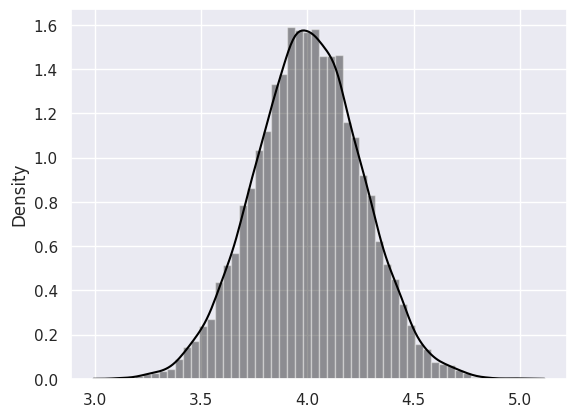

In [ ]:
# 표본평균의 히스토그램
sns.distplot(sample_mean_array, color = 'black')

### 샘플사이즈가 크면 표본평균은 모평균에 가까워진다

In [ ]:
# 샘플사이즈 준비(10~100010까지 100단위로 변화)
size_array =  np.arange(
    start = 10, stop = 100100, step = 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [ ]:
# 표본평균을 저장할 변수 준비
sample_mean_array_size = np.zeros(len(size_array))

In [ ]:
# 표본평균을 구하는 시행을 샘플사이즈를 변화시키면서 표본평균의 평균을 리스트화
# 즉, 첫 번째 표본은 샘플사이즈가 10개, 두 번째 표본은 샘플사이즈가 110개 ....
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    sample_mean_array_size[i] = sp.mean(sample)

<ipython-input-495-3926a181fc92>:6: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean_array_size[i] = sp.mean(sample)


Text(0, 0.5, 'sample mean')

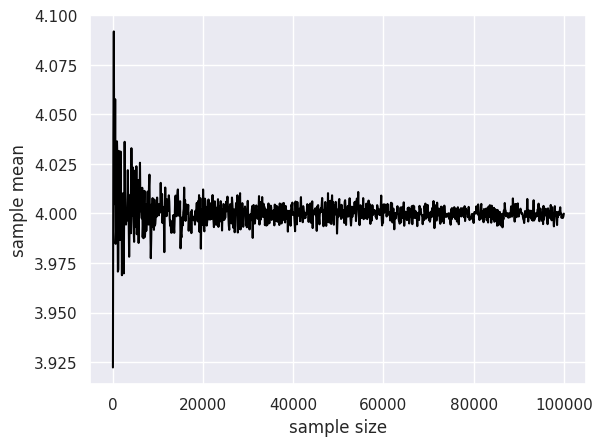

In [ ]:
# 샘플사이즈가 커질수록 모평균의 평균인 4와 가까워 지는 것을 알 수 있다.
plt.plot(size_array, sample_mean_array_size,
         color = 'black')
plt.xlabel("sample size")
plt.ylabel("sample mean")

<ipython-input-497-630c7d531429>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_mean_array_size, color = 'black')


<Axes: ylabel='Density'>

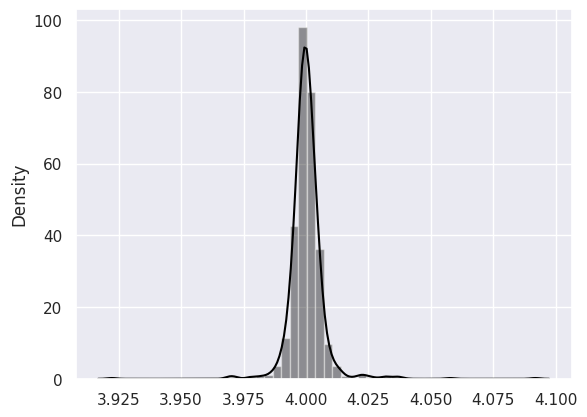

In [ ]:
# 샘플 사이즈를 변화시키는 표본평균의 히스토그램
sns.distplot(sample_mean_array_size, color = 'black')

### 표본평균을 몇 번이고 계산하는 함수 만들기

In [ ]:
# 샘플사이즈(size)와 실행횟수(n_trial)를 인수로 갖는 함수 생성
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size = size)
        sample_mean_array[i] = sp.mean(sample)
    return(sample_mean_array)

In [ ]:
# 샘플사이즈 10, 실행횟수 10000인 표본평균의 평균
# 즉, 각 표본은 10개의 샘플개수로 표본평균을 갖고
# 이 표본평균의 개수는 10000개이다.
# 표본평균이 10000개인 표본평균의 평균
np.random.seed(1)
sp.mean(calc_sample_mean(size = 10, n_trial = 10000))

<ipython-input-498-344296d70b70>:6: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean_array[i] = sp.mean(sample)


4.004202422791747

### 샘플아시즈를 바꿨을 때 표본평균의 분산

In [ ]:
np.random.seed(1)
# 샘플사이즈 10, 실행횟수(표본평균의 개수) 10000
size_10 = calc_sample_mean(size = 10, n_trial = 10000)
size_10_df = pd.DataFrame({
    "sample_mean":size_10,
    "size"       :np.tile("size 10", 10000)
})
# 샘플사이즈 20, 실행횟수(표본평균의 개수) 10000
size_20 = calc_sample_mean(size = 20, n_trial = 10000)
size_20_df = pd.DataFrame({
    "sample_mean":size_20,
    "size"       :np.tile("size 20", 10000)
})
# 샘플사이즈 30, 실행횟수(표본평균의 개수) 10000
size_30 = calc_sample_mean(size = 30, n_trial = 10000)
size_30_df = pd.DataFrame({
    "sample_mean":size_30,
    "size"       :np.tile("size 30", 10000)
})

# 종합
sim_result = pd.concat(
    [size_10_df, size_20_df, size_30_df])

# 출력
print(sim_result.head())

<ipython-input-498-344296d70b70>:6: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean_array[i] = sp.mean(sample)
<ipython-input-498-344296d70b70>:6: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean_array[i] = sp.mean(sample)
<ipython-input-498-344296d70b70>:6: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean_array[i] = sp.mean(sample)


   sample_mean     size
0     3.922287  size 10
1     3.864329  size 10
2     4.069530  size 10
3     3.857140  size 10
4     4.184654  size 10


<Axes: xlabel='size', ylabel='sample_mean'>

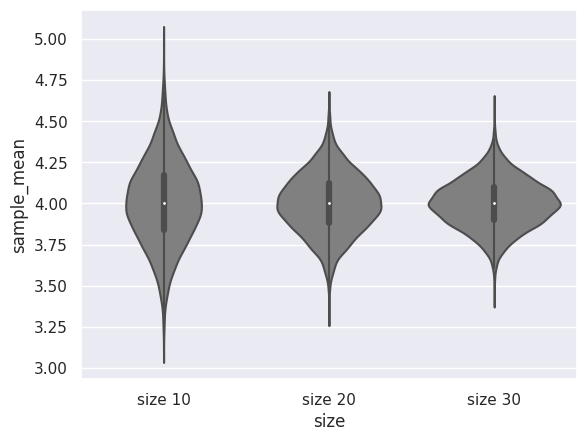

In [ ]:
# 샘플사이즈가 커질수록 표본평균이 흩어지는 정도가 작아져서
# 모평균 4에 가깝게 모인다.
sns.violinplot(x = "size", y = "sample_mean",
               data = sim_result, color = 'gray')

### 표본평균의 표준편차는 모집단보다 작다

In [ ]:
# 2~100 까지 2씩 차이나게 하여 샘플사이즈를 준비
size_array =  np.arange(
    start = 2, stop = 102, step = 2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [ ]:
# 표본평균의 표준편차를 저장할 변수 준비
sample_mean_std_array = np.zeros(len(size_array))

In [ ]:
# 시뮬레이션 실행, 실행횟수는 100으로 고정
# 즉, 샘플 사이즈가 2개이고 실행횟수(표본개수)는 100인 표본평균
# 샘플 사이즈가 4개이고 실행횟수(표본개수)는 100인 표본평균
# ....
# 의 표준편차를 구한다(자유도 N-1)
np.random.seed(1)
for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size =size_array[i],
                                   n_trial = 100)
    sample_mean_std_array[i] = sp.std(sample_mean,
                                      ddof = 1)

<ipython-input-498-344296d70b70>:6: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean_array[i] = sp.mean(sample)
<ipython-input-504-db4b1e65a055>:10: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  sample_mean_std_array[i] = sp.std(sample_mean,


Text(0, 0.5, 'mean_std value')

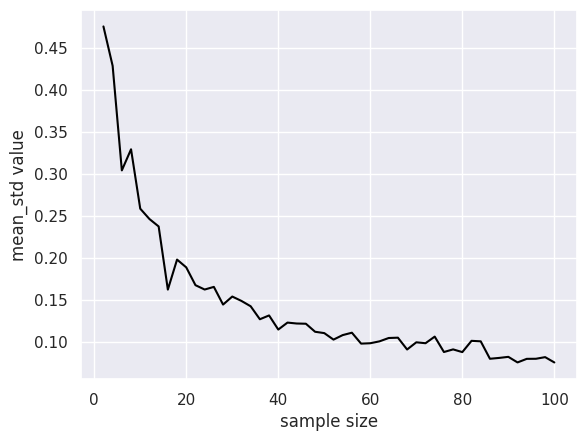

In [ ]:
# 샘플사이즈가 커질수록 표본평균의 표준편차는 줄어드는 것을 확인할 수 있다.
plt.plot(size_array, sample_mean_std_array,
         color = 'black')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

### 표준오차
- 표본평균의 표준편차 크기는 수식을 사용해서 계산할 수 있다.
- Standard Error (SE)
- 시그마는 표준편차이고, N은 샘플사이즈
- 즉, 샘플사이즈(N)가 커지면 표준오차는 작아진다.


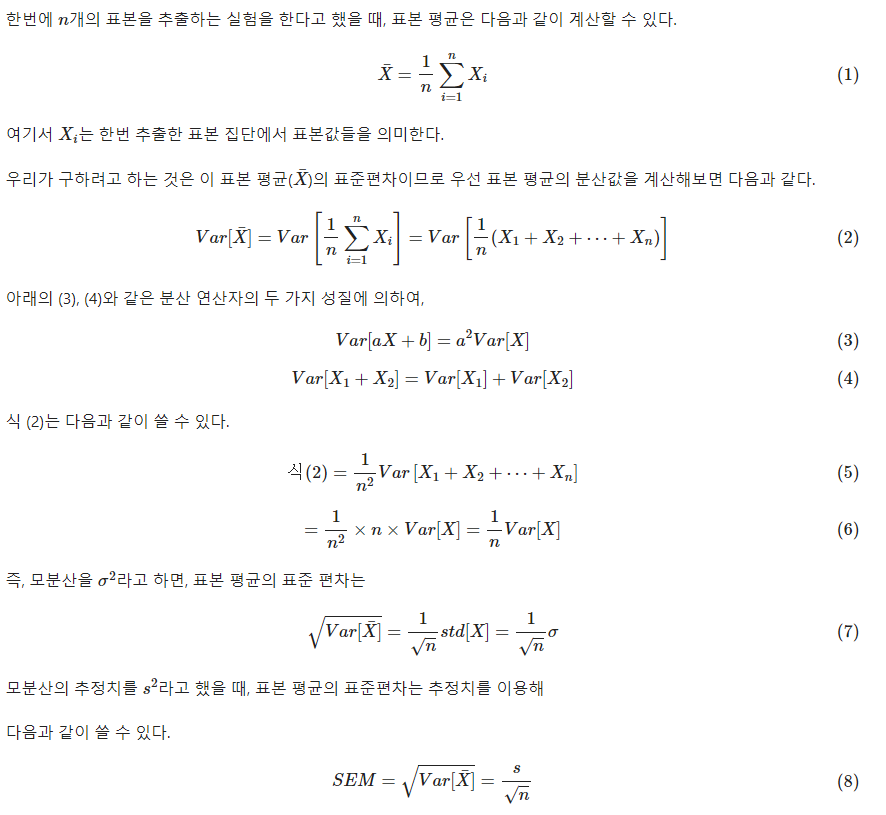

In [ ]:
# 모집단의 표준편차를 샘플사이즈로 나누어준다.
# 즉, 표준오차 array
standard_error = 0.8 / np.sqrt(size_array)
standard_error

array([0.566, 0.4  , 0.327, 0.283, 0.253, 0.231, 0.214, 0.2  , 0.189,
       0.179, 0.171, 0.163, 0.157, 0.151, 0.146, 0.141, 0.137, 0.133,
       0.13 , 0.126, 0.123, 0.121, 0.118, 0.115, 0.113, 0.111, 0.109,
       0.107, 0.105, 0.103, 0.102, 0.1  , 0.098, 0.097, 0.096, 0.094,
       0.093, 0.092, 0.091, 0.089, 0.088, 0.087, 0.086, 0.085, 0.084,
       0.083, 0.083, 0.082, 0.081, 0.08 ])

Text(0, 0.5, 'mean_std value')

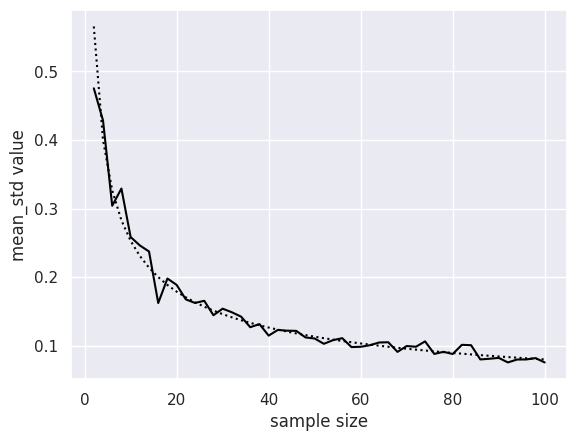

In [ ]:
# 시뮬레이션 결과와 표준오차의 값이 거의 일치하는 것을 확인

# 표본평균의 표준편차(실선)
plt.plot(size_array, sample_mean_std_array,
         color = 'black')
# 표준오차 (점선)
plt.plot(size_array, standard_error,
         color = 'black', linestyle = 'dotted')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

### 표본분산의 평균값은 모분산과 차이가 있다.

In [ ]:
# 표본분산을 저장할 변수 준비
sample_var_array = np.zeros(10000)

In [ ]:
# 시뮬레이션 실행
# 데이터를 10개(샘플사이즈 10개) 골라서 표본분산을 구하는 시행을 10000번(실행횟수 10000번) 반복
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    sample_var_array[i] = sp.var(sample, ddof = 0)

<ipython-input-509-3f70355157a7>:6: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  sample_var_array[i] = sp.var(sample, ddof = 0)


In [ ]:
# 표본분산의 평균
sp.mean(sample_var_array)

<ipython-input-510-6f374e9b9bdc>:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(sample_var_array)


0.5746886877332101

### 불편분산을 사용하면 편향이 사라진다.
- 위 표본분산의 평균을 확인하면 약 0.575로 모분산 0.8보다 과소평가 되었다는 것을 알 수 있다.
- 불편분산을 사용하면 편향이 제거된다.
- 인수로 ddof = 1 지정한다. (자유도 N-1)

In [ ]:
# 불편분산을 저장하는 변수
unbias_var_array = np.zeros(10000)
# 데이터를 10개 골라서 불편분산을 구하는 시행을
# 10000번 반복
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    unbias_var_array[i] = sp.var(sample, ddof = 1)
# 표본분산의 평균
sp.mean(unbias_var_array)

# 결과값을 보면 모분산과 거의 일치함을 알 수 있다.

<ipython-input-511-1fc394559108>:8: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  unbias_var_array[i] = sp.var(sample, ddof = 1)
<ipython-input-511-1fc394559108>:10: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(unbias_var_array)


0.6385429863702334

### 샘플사이즈가 크면 불편분산은 모분산에 가까워진다.

In [ ]:
# 10 ~ 100010 까지 100단위로 변화하는 샘플사이즈를 준비
size_array =  np.arange(
    start = 10, stop = 100100, step = 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [ ]:
# 불편분산을 저장하는 변수 준비
unbias_var_array_size = np.zeros(len(size_array))

In [ ]:
# 시뮬레이션 실행
# 불편분산을 구하는 시행을 샘플사이즈를 변화시켜가면서 size_array의 크기만큼 반복한다.
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    unbias_var_array_size[i] = sp.var(sample, ddof = 1)

<ipython-input-514-4add74e1fee6>:6: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  unbias_var_array_size[i] = sp.var(sample, ddof = 1)


Text(0, 0.5, 'unbias var')

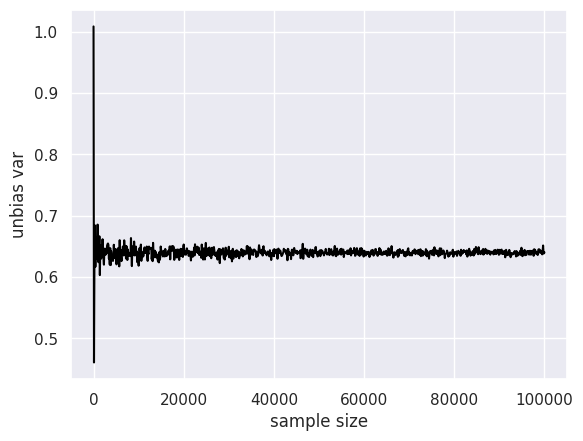

In [ ]:
# 그래프를 보면 샘플사이즈가 커지면 커질수록 불편분산은 모분산 0.64에 가까워지는 것을 알 수 있다.
plt.plot(size_array, unbias_var_array_size,
         color = 'black')
plt.xlabel("sample size")
plt.ylabel("unbias var")

### 중심극한정리

<ipython-input-516-4b8388e2fc23>:11: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  count_coin[i] = sp.sum(
<ipython-input-516-4b8388e2fc23>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(count_coin, color = 'black')


<Axes: ylabel='Density'>

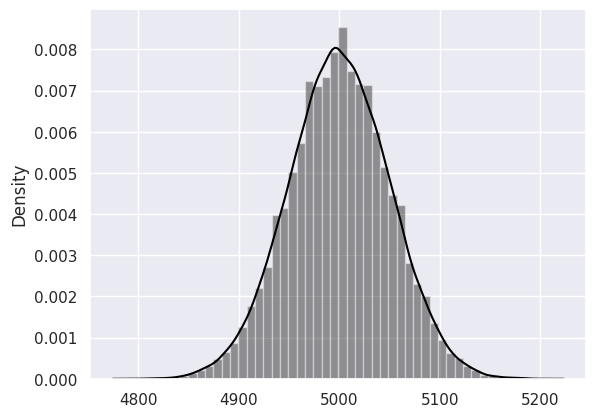

In [ ]:
# 샘플사이즈와 시행횟수
n_size  = 10000
n_trial = 50000
# 앞면이면 1, 뒷면이면 0으로 표시
coin = np.array([0,1])
# 앞면이 나온 횟수
count_coin = np.zeros(n_trial)
# 동전을 n_size 번 던지는 시행을 n_trial번 수행
np.random.seed(1)
for i in range(0, n_trial):
    count_coin[i] = sp.sum(
        np.random.choice(coin, size = n_size,
                         replace = True))
# 히스토그램
sns.distplot(count_coin, color = 'black')

## 정규분포와 응용

### 확률밀도

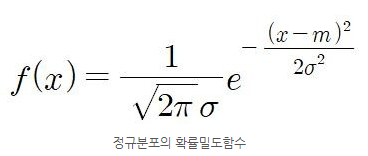

In [ ]:
# 원주율
sp.pi

3.142

In [ ]:
# 자연로그의 밑 e
sp.exp(1)

<ipython-input-518-49bfd1dfc857>:2: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  sp.exp(1)


2.718281828459045

In [ ]:
# 확률변수 x , 평균 mu, 표준편차 sigma
x = 3
mu = 4
sigma = 0.8

1 / (sp.sqrt(2 * sp.pi * sigma**2)) * \
    sp.exp(- ((x - mu)**2) / (2 * sigma**2))

<ipython-input-519-4898b880e679>:6: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  1 / (sp.sqrt(2 * sp.pi * sigma**2)) * \
<ipython-input-519-4898b880e679>:7: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  sp.exp(- ((x - mu)**2) / (2 * sigma**2))


0.22831135673627742

In [ ]:
stats.norm.pdf(loc = 4, scale = 0.8, x = 3)

0.2283113567362774

In [ ]:
norm_dist = stats.norm(loc = 4, scale = 0.8)
norm_dist.pdf(x = 3)

0.2283113567362774

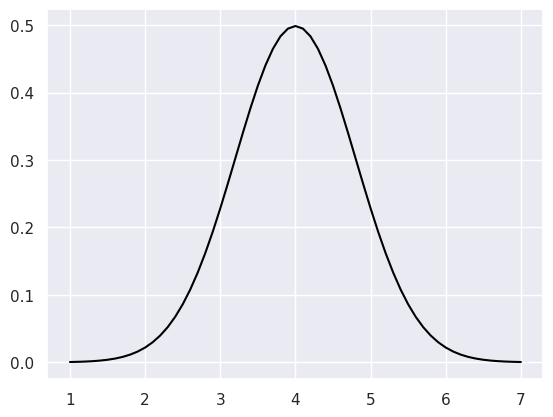

In [ ]:
x_plot = np.arange(start = 1, stop = 7.1, step = 0.1)
plt.plot(
    x_plot,
    stats.norm.pdf(x = x_plot, loc = 4, scale = 0.8),
    color = 'black'
)

### 표본이 어떤 값 이하가 되는 비율
- 표본이 어떤 값 이하가 되는 비율은
  - 어떤 값 이하가 되는 데이터 개수 / 샘플 사이즈

In [ ]:
np.random.seed(1)
simulated_sample = stats.norm.rvs(
    loc = 4, scale = 0.8, size = 100000)
simulated_sample

array([5.299, 3.511, 3.577, ..., 4.065, 4.275, 3.402])

In [ ]:
# 3이하인 데이터의 개수
sp.sum(simulated_sample <= 3)

<ipython-input-524-a3ed7e07526a>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sp.sum(simulated_sample <= 3)


10371

In [ ]:
# 표본이 어떤 값 (3) 이하가 되는 비율
sp.sum(simulated_sample <= 3) / len(simulated_sample)

<ipython-input-525-ebed4fca8874>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sp.sum(simulated_sample <= 3) / len(simulated_sample)


0.10371

### 누적분포함수(CDF)

In [ ]:
stats.norm.cdf(loc = 4, scale = 0.8, x = 3)

0.10564977366685535

In [ ]:
# 정규분포는 평균에 대해 좌우대칭이므로 데이터가 평균값 이하가 될 확률은 50%이다.
stats.norm.cdf(loc = 4, scale = 0.8, x = 4)

0.5

### 하측확률과 퍼센트포인트
- 데이터가 어떤 값 이하가 될 확률을 '하측확률'이라고 한다.
- 반대로 어떤 확률이 될 기준치를 '퍼센트포인트'라고 한다.
  - 확률변수 x가 N보다 낮을 확률은 M퍼센트다.
  - N은 변수, M은 확률

In [ ]:
# 평균이 4, 표준편차가 0.8
# 하측확률이 2.5% 되는 퍼센트포인트
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.025)

2.4320288123679563

In [ ]:
lower = stats.norm.cdf(loc = 4, scale = 0.8, x = 3)
stats.norm.ppf(loc = 4, scale = 0.8, q = lower)

3.0000000000000004

In [ ]:
# 하측확률이 50%되는 퍼센트포인트는 평균과 일치한다.
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.5)

4.0

### t값의 표본분포

In [ ]:
# 난수 시드 설정
np.random.seed(1)
# t값을 저장할 변수 설정
t_value_array = np.zeros(10000)
# 정규분포 클래스의 인스턴스
norm_dist = stats.norm(loc = 4, scale = 0.8)

# 시뮬레이션 실행
# 샘플사이즈 10 인 표본평균
# 표본평균의 평균 sample_mean
# 표본평균의 표존편차 sample_std
# 표준오차 sample_se
# t 분포 = (표본평균의 평균 - 모평균) / (표준오차)
# 10000번 실행 (-> 표본평균의 개수는 10000개 (실행횟수 10000번))

for i in range(0, 10000):
    sample = norm_dist.rvs(size = 10)
    sample_mean = sp.mean(sample)
    sample_std = sp.std(sample, ddof = 1)
    sample_se = sample_std / sp.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4) / sample_se

<ipython-input-531-5fc0ffe6c010>:18: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean = sp.mean(sample)
<ipython-input-531-5fc0ffe6c010>:19: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  sample_std = sp.std(sample, ddof = 1)
<ipython-input-531-5fc0ffe6c010>:20: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  sample_se = sample_std / sp.sqrt(len(sample))


<ipython-input-532-bdec01f79700>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(t_value_array, color = 'black')


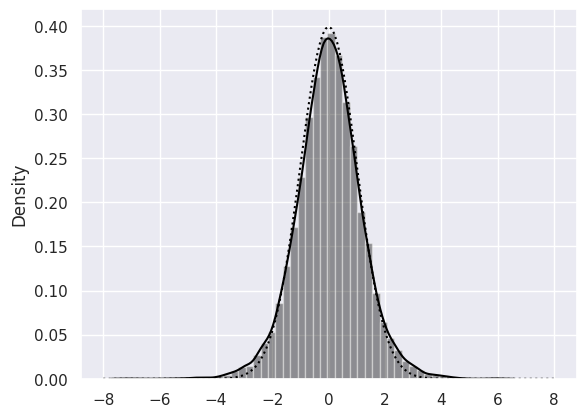

In [ ]:
# 표본에서 계산한 표준오차로 표준화된 표본평균의 분포
sns.distplot(t_value_array, color = 'black')

# 표준정규분포(z-score) 의 확률밀도 (점선)
x = np.arange(start = -8, stop = 8.1, step = 0.1)
# 표준정규분포는 stats.norm.pdf 에서 인수 loc와 scale 을 지정하지 않으면 된다.
plt.plot(x, stats.norm.pdf(x = x),
         color = 'black', linestyle = 'dotted')

# 표준오차로 나누었는데도 분포의 밑단이 넓어지고 있다.
# 분산이 1보다 크기 때문이다. (표준정규분포의 분산은 1)
# 표본에서 계산한 표준오차로 나누었기 때문이다.

### t분포
- 모집단 분포가 정규분포일 때, t값의 표본분포를 t분포라고 한다.
- 샘플사이즈가 N 일때 N-1로 계산한 값을 자유도라고 한다.
  - 샘플사이즈가 10이라면 자유도는 9이다.
  - 자유도가 n일경우 t분포는 t(n)으로 표기한다.
  - 샘플사이즈가 N 이면 t분포는 t(N-1)로 표기
- t분포의 평균값은 0, 분산은 1보다 조금 크다.
- 자유도를 n으로 했을 때 (n > 2): t(n)의 분산 = n / n-2
  - 즉 n(샘플사이즈)를 무한대로 보내면 분산은 1이 된다.

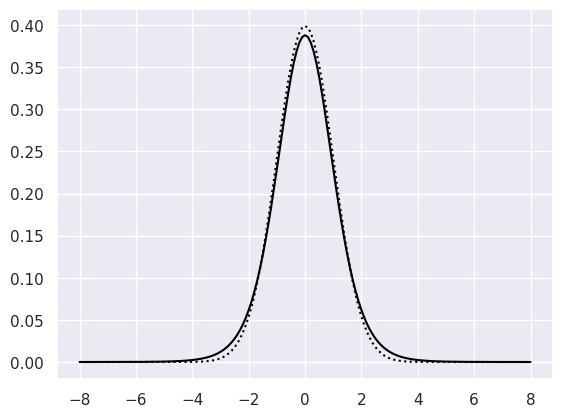

In [ ]:
# 정규분포의 커널밀도추정 (점선)
plt.plot(x, stats.norm.pdf(x = x),
         color = 'black', linestyle = 'dotted')

# t분포의 확률밀도
plt.plot(x, stats.t.pdf(x = x, df = 9),
         color = 'black')

<ipython-input-534-db2ca40fb15c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(t_value_array,


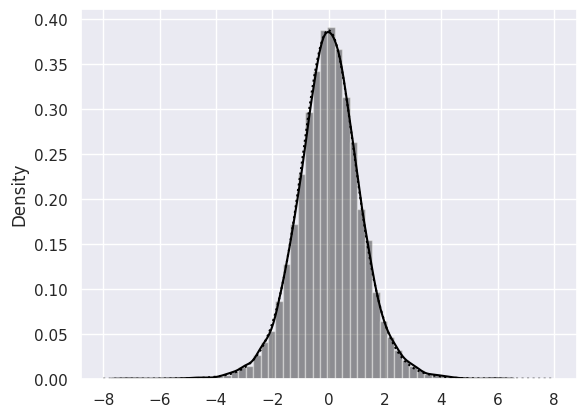

In [ ]:
# 표본에서 계산한 표준오차로 표준화된 표본평균의 분포와 t분포의 확률밀도
sns.distplot(t_value_array,
             color = 'black', norm_hist = True)
plt.plot(x, stats.t.pdf(x = x, df = 9),
         color = 'black', linestyle = 'dotted')

## 추정

### 분석 준비

In [ ]:
# 데이터 불러오기 (물고기 몸 길이 데이터)
fish = pd.read_csv("/content/drive/MyDrive/StatsCraftLab/practice/data/3-7-1-fish_length.csv")["length"]
fish

0    4.352982
1    3.735304
2    5.944617
3    3.798326
4    4.087688
5    5.265985
6    3.272614
7    3.526691
8    4.150083
9    3.736104
Name: length, dtype: float64

### 점추정

In [ ]:
# 모평균의 점추정
mu = sp.mean(fish)
mu

<ipython-input-536-6ce383644361>:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mu = sp.mean(fish)


4.187039324504523

In [ ]:
# 모분산의 점추정
sigma_2 = sp.var(fish, ddof = 1)
sigma_2

<ipython-input-537-864402e9e845>:2: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  sigma_2 = sp.var(fish, ddof = 1)


0.6803017080832623

### 구간추정
- 필요 요소: 자유도(샘플사이즈-1), 표본평균, 표준오차

In [ ]:
# 자유도
df = len(fish) - 1
df

9

In [ ]:
# 표준오차
se = sigma / sp.sqrt(len(fish))
se

<ipython-input-539-266b1a459c14>:2: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  se = sigma / sp.sqrt(len(fish))


0.25298221281347033

In [ ]:
# 구간추정
# t.interval 은 신뢰구간을 뜻한다.
# alpha 는 신뢰계수 즉 95%를 의미한다.
# loc 는 모평균, scale 은 표준오차
interval = stats.t.interval(
    alpha = 0.95, df = df, loc = mu, scale = se)
interval

<ipython-input-540-18701a9163ee>:5: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  interval = stats.t.interval(


(3.6147537997424655, 4.759324849266581)

### 신뢰구간을 구하는 방법 상세 설명

In [ ]:
# 97.5% 지점
t_975 = stats.t.ppf(q = 0.975, df = df)
t_975

2.2621571627409915

In [ ]:
# 하측신뢰한계 (표본평균 - 하측신뢰한계)*표준오차 (즉, (표본평균 - t분포의 2.5%지점)*표준오차 )
lower = mu - t_975 * se
lower

3.6147537997424655

In [ ]:
# 상측신뢰한계 (표본평균 - 상측신뢰한계)*표준오차 (즉, (표본평균 - t분포의 97.5%지점)*표준오차 )
upper = mu + t_975 * se
upper

4.759324849266581

### 신뢰구간의 폭을 결정하는 요소
- 표본의 분산 크기가 크면 신뢰구간의 폭이 넓어진다.
- 즉, 샘플사이즈가 작으면 신뢰구간의 폭이 넓어지고,
- 샘플사이즈가 커지면 신뢰구간의 폭이 좁아진다.

In [ ]:
# 표본 표준편차를 10배 증가하면 신뢰구간이 넓어진다.
se2 = (sigma*10) / sp.sqrt(len(fish))
stats.t.interval(
    alpha = 0.95, df = df, loc = mu, scale = se2)

<ipython-input-544-1eaf76d57013>:2: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  se2 = (sigma*10) / sp.sqrt(len(fish))
<ipython-input-544-1eaf76d57013>:3: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  stats.t.interval(


(-1.535815923116055, 9.9098945721251)

In [ ]:
# 샘플사이즈를 10배 증가하면 신뢰구간이 좁아진다.
df2 = (len(fish)*10) - 1
se3 = sigma / sp.sqrt(len(fish)*10)
stats.t.interval(
    alpha = 0.95, df = df2, loc = mu, scale = se3)

<ipython-input-545-9250b8aebeb6>:3: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  se3 = sigma / sp.sqrt(len(fish)*10)
<ipython-input-545-9250b8aebeb6>:4: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  stats.t.interval(


(4.028301968383829, 4.345776680625217)

In [ ]:
# 99% 신뢰구간은 95%의 신뢰구간보다 폭이 넓어진다.
stats.t.interval(
    alpha = 0.99, df = df, loc = mu, scale = se)

<ipython-input-546-13fe54c626ad>:2: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  stats.t.interval(


(3.3648887372996468, 5.0091899117094)

### 구간추정 결과의 해석

In [ ]:
# 신뢰구간이 모평균 "4"를 포함하면 True -> dtype = bool
# 시행횟수는 20000번 -> 크기가 20000인 배열필요
be_included_array = np.zeros(20000, dtype = "bool")
be_included_array

array([False, False, False, ..., False, False, False])

In [ ]:
# 95% 신뢰구간을 구하는 시행을 20000번 반복
# 신뢰구간이 모평균 "4"를 포함하면 True
np.random.seed(1)
norm_dist = stats.norm(loc = 4, scale = 0.8)
for i in range(0, 20000):
    sample = norm_dist.rvs(size = 10)
    df = len(sample) - 1
    mu = sp.mean(sample)
    std = sp.std(sample, ddof = 1)
    se = std / sp.sqrt(len(sample))
    interval = stats.t.interval(0.95, df, mu, se)
    if(interval[0] <= 4 and interval[1] >= 4):
        be_included_array[i] = True

<ipython-input-548-755159a22d64>:8: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mu = sp.mean(sample)
<ipython-input-548-755159a22d64>:9: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  std = sp.std(sample, ddof = 1)
<ipython-input-548-755159a22d64>:10: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  se = std / sp.sqrt(len(sample))


In [ ]:
# 신뢰구간이 모평균 "4"를 포함한 비율
sum(be_included_array) / len(be_included_array)

0.948

## 통계적 가설검정
- 통계적 가설검정은 표본을 사용해서 모집단에 관한 통계적인 판단을 내리는 방법이다.
- 판단의 기준으로서 통계적인 표현을 사용하는 것이 특징. 간단히 검정이라고도 부른다.
- 통계적 가설검정에는 여러 가지 종류가 있으며, 판단하는 대상 역시 방법에 따라 다양하다.
- t검정에서 유의마한 차이 조건
  1. 큰 샘플에서 조사: 샘플사이즈가 크다.
  2. 데이터의 흩어짐(분산)이 작다.
  3. 평균값의 차이가 크다
- p-value(p 값) 이란 표본과 귀무가설 간의 모순을 나타낸다.
  - p-value 값이 작을수록 귀무가설과 표본이 모순된다.
- p-value 가 유의수준을 밑돌면 귀무가설을 기각한다.
  - 유의수준이란 귀무가설을 기각하는 기준이 되는 값. 통상 유의수준은 5%를 사용
  - 이 때, p-value는 0.05보다 적어야 유의미한 값을 가진다고 할 수 있다.
  - 유의수준은 위험률 이라고도 한다.

### t검정의 구현: 분석준비

In [ ]:
# 데이터 불러오기
# 봉지과자 중량을 추정한 데이터 (샘플사이즈는 20이다.)
junk_food = pd.read_csv(
    "/content/drive/MyDrive/StatsCraftLab/practice/data/3-8-1-junk-food-weight.csv")["weight"]
junk_food.head()

0    58.529820
1    52.353039
2    74.446169
3    52.983263
4    55.876879
Name: weight, dtype: float64

- 귀무가설: 봉지과자의 평균중량이 50g이다.
- 대립가설: 봉지과자의 평균중량이 50g이 아니다.
- 유의수준 5% -> p-value 값이 0.05보다 낮다면 귀무가설은 기각되고, 봉지과자의 중량은 유의미하게 50g 과 다르다고 할 수 있다.

### t검정의 구현: t값 계산

In [ ]:
# 표본평균
mu = sp.mean(junk_food)
mu

<ipython-input-551-7695cd9eebee>:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mu = sp.mean(junk_food)


55.38496619666667

In [ ]:
# 자유도
df = len(junk_food) - 1
df

19

In [ ]:
# 표본오차
sigma = sp.std(junk_food, ddof = 1)
se = sigma / sp.sqrt(len(junk_food))
se

<ipython-input-553-c5e44ce15781>:2: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  sigma = sp.std(junk_food, ddof = 1)
<ipython-input-553-c5e44ce15781>:3: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  se = sigma / sp.sqrt(len(junk_food))


1.9579276805755885

In [ ]:
# t값
t_value = (mu - 50) / se
t_value

2.7503396831713434

### t검정의 구현: p-value

In [ ]:
# p-value (양측검정)
# t값이 평균보다 크거나 작을 확률은 (1-a)*2 이다.
alpha = stats.t.cdf(t_value, df = df)
(1 - alpha) * 2

0.012725590012524268

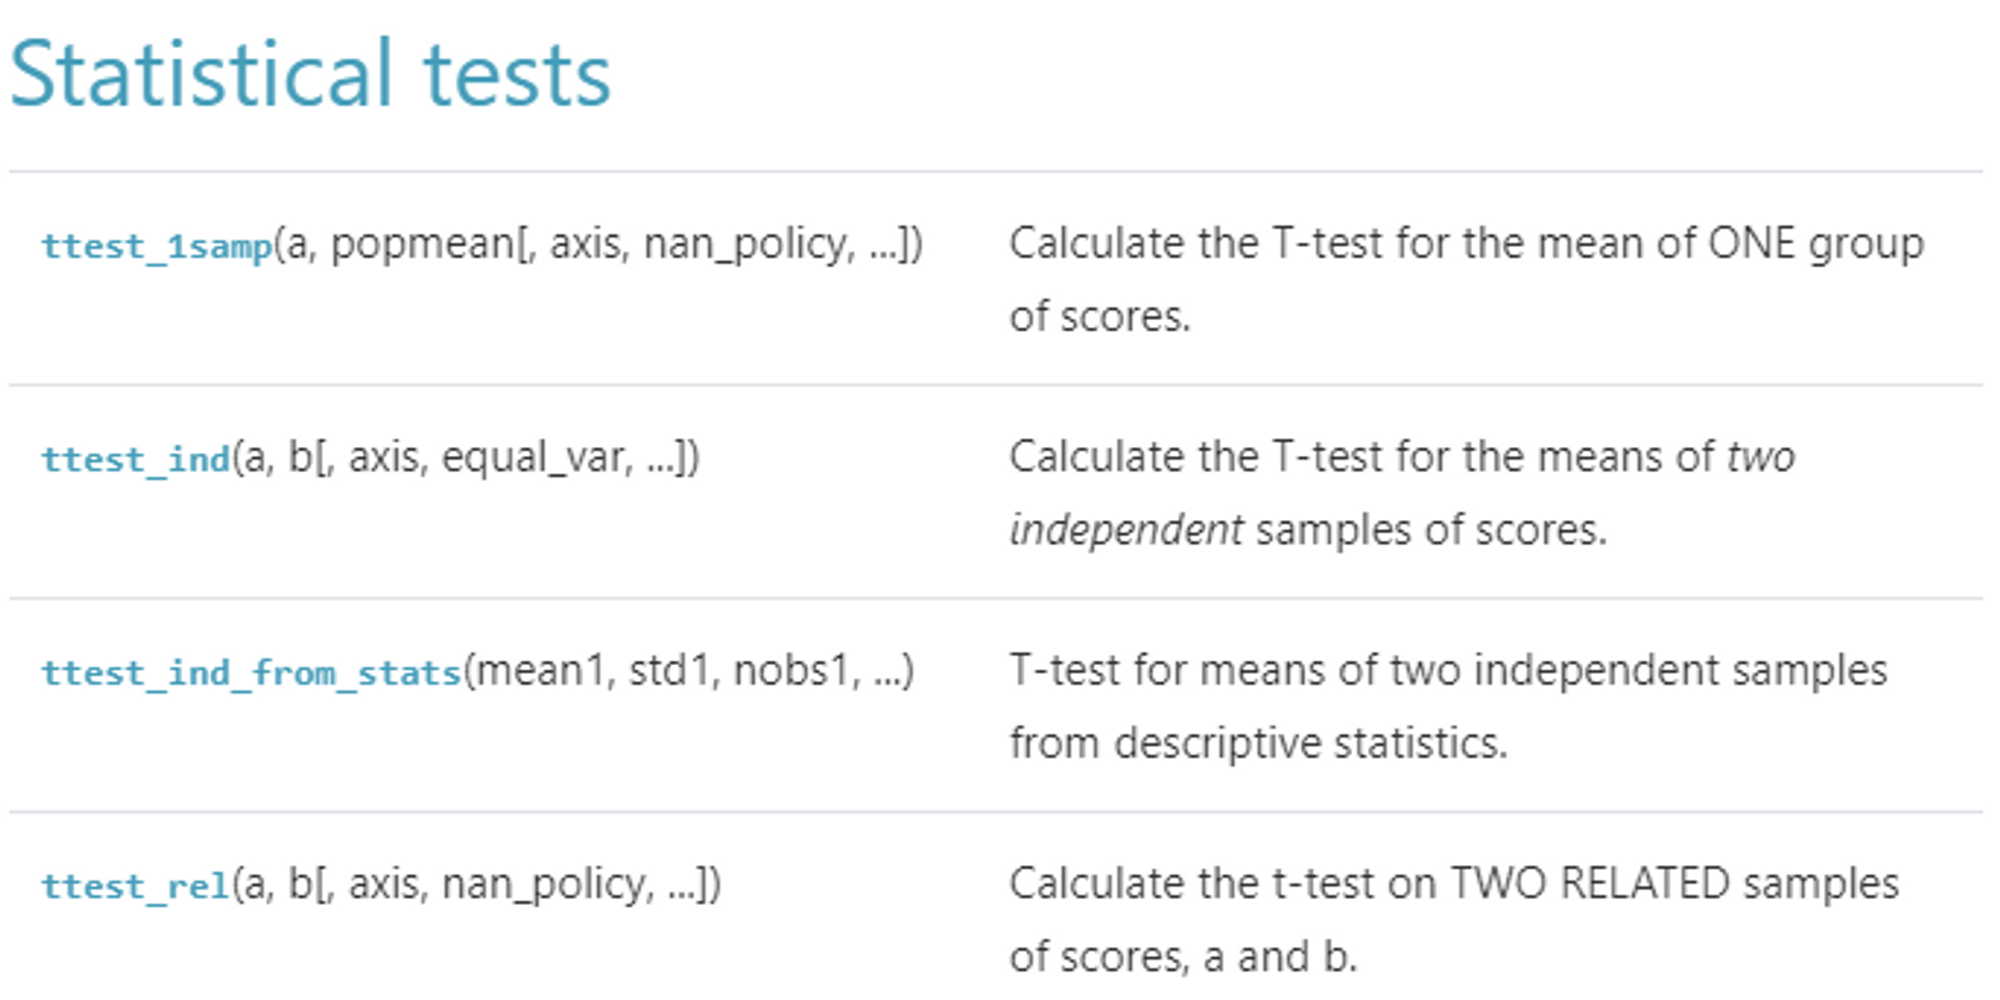

- ttest_1samp : 하나의 점수 그룹의 평균에 대한 T-검정을 계산합니다.
- ttest_ind: *두 개의 독립적인* 점수 샘플의 평균 에 대한 T-검정을 계산합니다 .
- ttest_ind_from_stats: 기술통계에서 추출한 2개의 독립적인 샘플의 수단에 대한 T-검정.
- ttest_rel: 점수 a와 b의 두 관련 샘플 (대응표본)에 대한 t-검정을 계산합니다.

In [ ]:
# scipy.stats 의 ttest_1samp 검정
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html
stats.ttest_1samp(junk_food, 50)

TtestResult(statistic=2.7503396831713434, pvalue=0.012725590012524155, df=19)

### 시뮬레이션에 의한 p-value 계산

In [ ]:
# 샘플사이즈
size = len(junk_food)
# 표본의 표준편차(N-1 -> 불편표준편차)
sigma = sp.std(junk_food, ddof = 1)

<ipython-input-557-47ddc4c87b98>:4: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  sigma = sp.std(junk_food, ddof = 1)


In [ ]:
# t값을 저장할 array 준비
t_value_array = np.zeros(50000)

In [ ]:
# 표본추출과 t값 계산을 50000번 반복
np.random.seed(1)
norm_dist = stats.norm(loc = 50, scale = sigma)
for i in range(0, 50000):
    sample = norm_dist.rvs(size = size)
    sample_mean = sp.mean(sample)
    sample_std = sp.std(sample, ddof = 1)
    sample_se = sample_std / sp.sqrt(size)
    t_value_array[i] = (sample_mean - 50) / sample_se

<ipython-input-559-aecbd562ce39>:6: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean = sp.mean(sample)
<ipython-input-559-aecbd562ce39>:7: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  sample_std = sp.std(sample, ddof = 1)
<ipython-input-559-aecbd562ce39>:8: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  sample_se = sample_std / sp.sqrt(size)


In [ ]:
(sum(t_value_array > t_value) / 50000) * 2

0.01324

## 평균값의 차이 검정

### 분석준비

In [ ]:
# データの読み込み
paired_test_data = pd.read_csv(
    "/content/drive/MyDrive/StatsCraftLab/practice/data/3-9-1-paired-t-test.csv")
print(paired_test_data)

  person medicine  body_temperature
0      A   before              36.2
1      B   before              36.2
2      C   before              35.3
3      D   before              36.1
4      E   before              36.1
5      A    after              36.8
6      B    after              36.1
7      C    after              36.8
8      D    after              37.1
9      E    after              36.9


- 귀무가설: 약을 먹기 전과 후의 체온이 변하지 않는다.
- 대립가설: 약을 먹기 전과 후의 체온이 다르다.
- 유의수준 5%: p-value 가 0.05보다 작으면 귀무가설은 기각되고, 약을 먹으면 체온이 유의미한 수준으로 변화한다고 볼 수 있다.

### 대응표본 t검정
- 약을 먹기 전과 후에 체온의 차이가 얼마나 되는지 조사하는 것과 같이
- 같은 대상을 다른 조건으로 2번 측정해서 그 차이를 보는 경우 대응표본 t검정을 사용할 수 있다.
- scipy.stats 의 ttest_rel() 이용

In [ ]:
# 시리즈형으로 계산하기 여러우므로 약을 먹기 전과 후 각각의 경우를 변수로 저장하고, 배열형으로 변환

# 약을 먹기 전과 후의 표본평균
before = paired_test_data.query(
    'medicine == "before"')["body_temperature"]
after = paired_test_data.query(
    'medicine == "after"')["body_temperature"]
# 배열형으로 변환
before = np.array(before)
after = np.array(after)
# 차이 계산
diff = after - before
diff

array([ 0.6, -0.1,  1.5,  1. ,  0.8])

In [ ]:
# 차잇값의 평균값이 0과 다른지 1집단 t검정 (ttest_1samp)
stats.ttest_1samp(diff, 0)

TtestResult(statistic=2.901693483620596, pvalue=0.044043109730074276, df=4)

In [ ]:
# ttest_rel 함수로 간단하게 검정
# ttest_rel: 점수 a와 b의 두 관련 샘플 (대응표본)에 대한 t-검정을 계산
# 유의미한 차이가 있다고 할 수 있다. p-value < 0.05
stats.ttest_rel(after, before)

TtestResult(statistic=2.901693483620596, pvalue=0.044043109730074276, df=4)

In [ ]:
stats.ttest_rel(after, before, alternative = 'two-sided')

TtestResult(statistic=2.901693483620596, pvalue=0.044043109730074276, df=4)

- ttest_rel의 매개변수 중 'alternative' 설정
  - 'two-sided': 2개의 표본의 분포 수단이 같지 않은 경우
  - 'less’: 첫 번째 표본('after’)의 평균이 두 번째 표본('before’) 의 평균보다 작은 경우
  - 'greater’: 첫 번째 표본('after')의 평균이 두 번째 표본('before') 의 평균보다 큰 경우
    - 위 코드식에서는 'two-sided'임을 확인 (default)

### 독립표본 t검정
- 독립표본 t검정은 독립표본 데이터에 적용한다.
   - 실습 데이터는 단지 학습을 위해 데이터를 사용할 뿐이다.
- 독립표본 t검정은 '평균값의 차이'에 주목한다.
- 대응표본 t검정은 '데이터 차이'를 보고 1집단 t검정(ttest_1samp) 또는 ttest_rel을 이용한다.

In [ ]:
# 평균값
mean_bef = sp.mean(before)
mean_aft = sp.mean(after)

# 분산
sigma_bef = sp.var(before, ddof = 1)
sigma_aft = sp.var(after, ddof = 1)

# 샘플사이즈
m = len(before)
n = len(after)

# t값
t_value = (mean_aft - mean_bef) / \
    sp.sqrt((sigma_bef/m + sigma_aft/n))
t_value

<ipython-input-566-4f0c7380ed9e>:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean_bef = sp.mean(before)
<ipython-input-566-4f0c7380ed9e>:3: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean_aft = sp.mean(after)
<ipython-input-566-4f0c7380ed9e>:6: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  sigma_bef = sp.var(before, ddof = 1)
<ipython-input-566-4f0c7380ed9e>:7: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  sigma_aft = sp.var(after, ddof = 1)
<ipython-input-566-4f0c7380ed9e>:15: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  sp.sqrt((sigma_bef/m + sigma_aft/n))


3.1557282344421034

In [ ]:
# ttest_ind 함수 이용
# 매개변수 equal_var: True(기본값)인 경우 동일한 모집단 분산을 가정하는 표준 독립 2표본 검정을 수행
# False이면 동일한 모집단 분산을 가정하지 않는 Welch의 t-검정을 수행.
stats.ttest_ind(after, before, equal_var = False)

Ttest_indResult(statistic=3.1557282344421034, pvalue=0.013484775682079892)

- 오래된 통계학 입문서에는 데이터의 등분산성을 검정한 뒤 분산이 다르다고 가정한 t검정과 분산이 같다고 가정한 t검정을 구별한다고 한다.
  - ttest_ind 의 매개변수 'eqaul_var = True'
- 하지만 항상 분산이 다르다고 가정하고 t검정을 사용해도 상관없다. 즉, 언제나 Welch 검정을 사용해도 된다.
  - ttest_ind 의 매개개변수 'equal_var = False'

In [ ]:
# 거의 차이가 없다고 볼 수 있다.
stats.ttest_ind(after, before, equal_var = True)

Ttest_indResult(statistic=3.1557282344421034, pvalue=0.013481508481701042)

### P 해킹
- 물고기의 덩치를 키우기 위한 새로운 먹이를 개발하고 있다고 가정해보자.
- 새로 개발한 먹이를 사용한 경우와 보통의 먹이를 사용한 경우의 물고기의 덩치를 비교한다.
- 여기서 유의미한 차이가 나온다면 상품 개발은 대성공이다.
- 이 때, 독립표본 t검정을 실행할 것 이다.
  - 두 표본은 서로 다른 약을 복용해서 얻은 독립된 표본이므로
- 하지만 만약 t검정에서 p-value가 0.053이 되어 아슬아슬하게 유의미한 차이를 얻지 못하였다면 어떨까?
- p-value 값을 낮추기 위해 다른 검정을 하거나 데이터를 변환하여 검정하거나, 데이터 일부를 제거하고 검정하며 유의미한 차이를 얻을 때까지 조사를 계속는 경우가 있을 수 있다.
- 하지만, 이렇게 얻은 유의미한 차이가 정말 의미가 있을까?
- 이렇게 p-value 를 자의적으로 변화시키는 것을 p해킹이라고 한다.
- 데이터 분석은 원하는 결과를 얻기 위해 하는 것이 아니라, 현실을 알기 위해 하는 것이다. 따라서 분석가라면 최소한 데이터 만큼은 성실하게 대해야 한다.

## 분할표 검정 (카이제곱검정)

### 카이제곱 검정

In [ ]:
# 데이터 불러오기 (버튼 색에 따른 클릭수)
click_data = pd.read_csv("/content/drive/MyDrive/StatsCraftLab/practice/data/3-10-1-click_data.csv")
print(click_data)

  color  click  freq
0  blue  click    20
1  blue    not   230
2   red  click    10
3   red    not    40


In [ ]:
# pvit을 이용한 분할표로 표시
cross = pd.pivot_table(
    data = click_data,
    values = "freq",
    aggfunc = "sum",
    index = "color",
    columns = "click"
)
print(cross)

click  click  not
color            
blue      20  230
red       10   40


- 해당 실습은 버튼을 버튼 색에 따라 더 많이 클릭하는지 보여주는 것이다.
- 위 'cross' 출력값과 같이 실제 관측된 데이터를 '관측도수'라고 한다.
- 클릭률을 계산해보면 파란 버튼이 8%, 빨간 버튼이 20% 로 빨간 버튼 쪽이 높다는 것을 알 수 있다. 이 것이 의미 있는 차이를 가지는지 통계적가설검정을 사용하여 판단한다.
- 버튼 색에 따라 버튼 클릭이 변하지 않는 경우 기대되는 도수를 '기대도수'라고 한다.
  - '버튼 클릭 수 데이터'('cross')를 보면 전체 클릭수는 30이고 클릭하지 않은 수는 270 이다. 즉 전체 데이터 크기는 300 이다.
  - 따라서, 버튼의 색을 무시했을 때의 클릭함 또는 클릭하지 않음의 비율이 '클릭함 : 클릭하지 않음 = 30 : 270' , 즉 1 : 9 인 것을 알 수 있다.
  - 색을 무시하면 전체의 10% 사람만이 버튼을 클릭한다.
    - 실험 대상이 된 사람은 '파란버튼' 250 명, '빨간버튼' 50 명이다.
    - 이 중 10% 만 버튼을 클릭한다고 했을 때, 버튼을 클릭한 사람의 기대도수는 '파란버튼' 25 명, '빨간버튼' 5 명 이다.
    - 버튼을 클릭하지 않은 사람수는 전체 사람 수에서 클릭한 사람수를 뺀 것으로 '파란버튼 클릭하지 않음' 225 명,  '빨간버튼 클릭하지 않음' 45 명 이다.
- 기대도수와 관측된 도수를 비교하여 차이가 크면 버튼 색에 따라 버튼 클릭이 달라진다고 볼 수 있다. 이를 통해 카이제곱 통계량과 p-value를 구한다.
  - '기대도수가 전부 5 이상'이어야 카이검정을 한다.
- 카이제곱 통계량은 각 행과 열의 (관측도수 값 - 기대도수 값)**2 / (기대도수 값)을 모두 더한 값이다.
  - 계산 결과 카이제곱 통계량은 6.667이다.

### 누적확률분포를 통한 카이제곱 검정의 p-value

In [ ]:
# 자유도가 1인 카이제곱의 누적밀도 함수를 사용해서 p값을 계산
# 카이제곱 통계량은 6.667
1 - sp.stats.chi2.cdf(x = 6.667, df = 1)

0.009821437357809604

### 카이제곱 검정 함수를 이용하여 통계량, p-value, 자유도, 기대도수 구하기

In [ ]:
# 카이제곱 검정실행
# 불필요한 보정은 하지 않도록 'correction = False'
sp.stats.chi2_contingency(cross, correction = False)

Chi2ContingencyResult(statistic=6.666666666666666, pvalue=0.009823274507519247, dof=1, expected_freq=array([[ 25., 225.],
       [  5.,  45.]]))